Import Data

In [68]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("patrickb1912/ipl-complete-dataset-20082020")
path=r'C:\Users\Maddox\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3'
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Maddox\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3


In [69]:
import os
all_file=os.listdir(path)
file_1,file_2=all_file
file_2

'matches.csv'

In [70]:
file_1_path=path + '/' + file_1
print(file_1_path)

file_2_path=path + '/' + file_2
print(file_2_path)

C:\Users\Maddox\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/deliveries.csv
C:\Users\Maddox\.cache\kagglehub\datasets\patrickb1912\ipl-complete-dataset-20082020\versions\3/matches.csv


In [71]:
#import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("All modules called")

df_matches=pd.read_csv(file_2_path)
df_delivery=pd.read_csv(file_1_path)



All modules called


In [72]:
display(df_delivery.head(2))
display(df_matches.head(2))

print(df_matches.shape)
print(df_delivery.shape)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


(1095, 20)
(260920, 17)


In [73]:
df_matches.info()
#There are null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [74]:
display(df_matches.isnull().sum().sort_values(ascending=False))
display(df_matches['winner'])

method             1074
city                 51
result_margin        19
player_of_match       5
winner                5
target_runs           3
target_overs          3
id                    0
date                  0
season                0
venue                 0
match_type            0
toss_decision         0
toss_winner           0
team2                 0
team1                 0
result                0
super_over            0
umpire1               0
umpire2               0
dtype: int64

0             Kolkata Knight Riders
1               Chennai Super Kings
2                  Delhi Daredevils
3       Royal Challengers Bangalore
4             Kolkata Knight Riders
                   ...             
1090            Sunrisers Hyderabad
1091          Kolkata Knight Riders
1092               Rajasthan Royals
1093            Sunrisers Hyderabad
1094          Kolkata Knight Riders
Name: winner, Length: 1095, dtype: object

<Axes: >

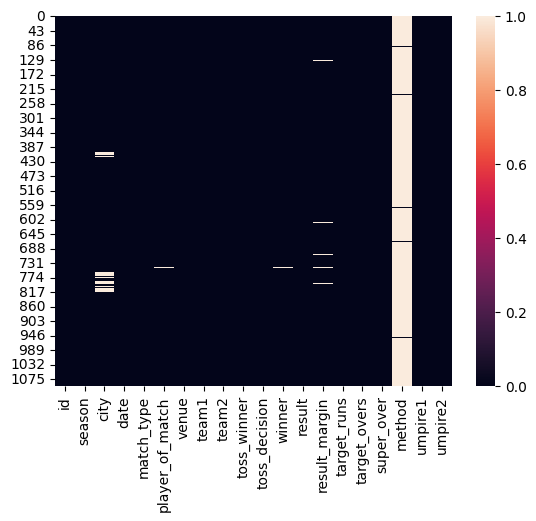

In [75]:
sns.heatmap(df_matches.isnull())

In [76]:
#null value count in percentage
df_matches.isnull().mean().sort_values(ascending=False)*100

method             98.082192
city                4.657534
result_margin       1.735160
player_of_match     0.456621
winner              0.456621
target_runs         0.273973
target_overs        0.273973
id                  0.000000
date                0.000000
season              0.000000
venue               0.000000
match_type          0.000000
toss_decision       0.000000
toss_winner         0.000000
team2               0.000000
team1               0.000000
result              0.000000
super_over          0.000000
umpire1             0.000000
umpire2             0.000000
dtype: float64

In [77]:
#now check what this 'method' column is like
display(df_matches['method'].value_counts())
#only 1 data (D/L) which was used 21 times
#we'll fill all other methods with "Normal" method

method
D/L    21
Name: count, dtype: int64

In [78]:
df_matches['method'].fillna('Normal Method',inplace=True)
display(df_matches.isnull().sum().sort_values(ascending=False))
#Now no missing values in df_matches['method']

C:\Users\Maddox\AppData\Local\Temp\ipykernel_23784\1709395566.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['method'].fillna('Normal Method',inplace=True)


city               51
result_margin      19
player_of_match     5
winner              5
target_overs        3
target_runs         3
id                  0
season              0
date                0
team1               0
venue               0
match_type          0
toss_decision       0
toss_winner         0
team2               0
result              0
super_over          0
method              0
umpire1             0
umpire2             0
dtype: int64

**Now lets treat the "city" column**

In [79]:
display(df_matches['city'].value_counts())
display(df_matches['city'].value_counts().sum())

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Visakhapatnam      15
Durban             15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Navi Mumbai         9
Indore              9
Johannesburg        8
Ranchi              7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

np.int64(1044)

In [80]:
#Display all the rows with null values in 'city' column 
df_matches[df_matches['city'].isnull()]
#Fill the NaN values in 'city' column
df_matches['city'].fillna('UAE',inplace=True)# all the venue shows that all city with NaN were in Dubai (UAE)

C:\Users\Maddox\AppData\Local\Temp\ipykernel_23784\302991341.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['city'].fillna('UAE',inplace=True)# all the venue shows that all city with NaN were in Dubai (UAE)


**Now we'll work on "result_margin" column**

In [81]:
df_matches['result_margin'].info()
df_matches['result_margin'].value_counts()
df_matches['result_margin'].value_counts().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: result_margin
Non-Null Count  Dtype  
--------------  -----  
1076 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


np.int64(1076)

In [82]:
#Display all the rows with null values in 'result_margin' column 
df_matches[df_matches['result_margin'].isnull()]
#Fill the NaN values in 'city' column
df_matches['result_margin'].fillna(0.00,inplace=True)

C:\Users\Maddox\AppData\Local\Temp\ipykernel_23784\2922937291.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_matches['result_margin'].fillna(0.00,inplace=True)


In [83]:
#These columns with Null values left
# winner             0.456621
# player_of_match    0.456621
# target_overs       0.273973
# target_runs        0.273973

**Now we'll work on "winner" column and 'player_of_match'**

In [84]:
# #Display all the rows with null values in 'result_margin' column 
# display(df_matches[df_matches['winner'].isnull()])
# #Fill the NaN values in 'city' column
# df_matches['winner'].fillna('No Winner',inplace=True)
# #null value count in percentage
# df_matches.isnull().mean().sort_values(ascending=False)*100

In [85]:
#Display all the rows with null values in 'result_margin' column 
display(df_matches[df_matches['winner'].isnull()])
#Fill the NaN values in 'city' column
df_matches.fillna({'player_of_match':'No Player of the match',
                   'winner':'No Winner'},inplace=True)
#null value count in percentage after treating missing values
df_matches.isnull().mean().sort_values(ascending=False)*100


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,0.0,NaN,NaN,N,Normal Method,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,NaN,NaN,N,Normal Method,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,0.0,188.0,20.0,N,Normal Method,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,2019-04-30,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,0.0,63.0,5.0,N,Normal Method,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,2023-05-03,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,0.0,NaN,NaN,N,Normal Method,AK Chaudhary,NA Patwardhan


target_overs       0.273973
target_runs        0.273973
id                 0.000000
season             0.000000
date               0.000000
city               0.000000
match_type         0.000000
player_of_match    0.000000
team2              0.000000
toss_winner        0.000000
venue              0.000000
team1              0.000000
winner             0.000000
toss_decision      0.000000
result_margin      0.000000
result             0.000000
super_over         0.000000
method             0.000000
umpire1            0.000000
umpire2            0.000000
dtype: float64

**Now we'll work on "target_overs" column and 'targer_runs'**

In [86]:
#Here all the NaN values will filled with the value 0 i.e., 'target_runs','target_overs'
df_matches.fillna(0,inplace=True)

#null value count in percentage after treating missing values
df_matches.isnull().mean().sort_values(ascending=False)*100


id                 0.0
season             0.0
city               0.0
date               0.0
match_type         0.0
player_of_match    0.0
venue              0.0
team1              0.0
team2              0.0
toss_winner        0.0
toss_decision      0.0
winner             0.0
result             0.0
result_margin      0.0
target_runs        0.0
target_overs       0.0
super_over         0.0
method             0.0
umpire1            0.0
umpire2            0.0
dtype: float64

**Done with Data Cleaning[fillna]**

<Axes: >

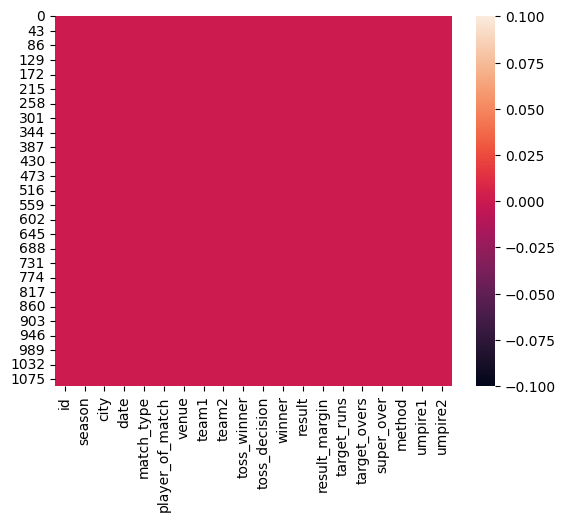

In [87]:
sns.heatmap(df_matches.isnull())

In [88]:
display(df_matches['city'].value_counts())
#We have different names for same place
# df_matches[df_matches['city'].value_counts()=='Dubai']

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
UAE                51
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Durban             15
Visakhapatnam      15
Lucknow            14
Dubai              13
Dharamsala         13
Centurion          12
Rajkot             10
Sharjah            10
Indore              9
Navi Mumbai         9
Johannesburg        8
Ranchi              7
Port Elizabeth      7
Cuttack             7
Cape Town           7
Raipur              6
Kochi               5
Mohali              5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Guwahati            3
Bloemfontein        2
Name: count, dtype: int64

Let's change the name to a same name for same place with different names

In [89]:
# changing the data
dict1={'Navi Mumbai':'Mumbai','Bengaluru':'Bangalore',
       'Sharjah':'UAE', 'Abu Dhabi':'UAE',
       'Kimberley':'Cape Town','Dubai':'UAE'}
df_matches.replace(dict1,inplace=True)
print('Done')

Done


Check and drop duplicated

In [90]:
display(df_matches.duplicated().value_counts())
#No Duplicates!!! All False!!!
display(df_matches.drop_duplicates(inplace=True))

False    1095
Name: count, dtype: int64

None

Lets make data column as Data data_type instead of object data_type for ARIMA (Time series analysis)

In [91]:
df_matches['date']=pd.to_datetime(df_matches['date'])
print('Done')
display(df_matches['date'].info())

Done
<class 'pandas.core.series.Series'>
RangeIndex: 1095 entries, 0 to 1094
Series name: date
Non-Null Count  Dtype         
--------------  -----         
1095 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.7 KB


None

Done with Pre-Processing, starting with Analysis